In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('ct_gov_covid.csv')

In [3]:
df.head()

,Rank,NCT Number,Title,Status,Study Results,Interventions,Outcome Measures,Phases,Enrollment,URL
0,1,NCT04344600,Peginterferon Lambda-1a for the Prevention and...,Not yet recruiting,No Results Available,Drug: Peginterferon lambda alfa-1a subcutaneou...,Proportion of participants with no evidence of...,Phase 2,164.0,https://ClinicalTrials.gov/show/NCT04344600
1,2,NCT04323761,Expanded Access Treatment Protocol: Remdesivir...,Available,No Results Available,Drug: Remdesivir,NaN,NaN,NaN,https://ClinicalTrials.gov/show/NCT04323761
2,3,NCT04372082,Hydroxychloroquine or Diltiazem-Niclosamide fo...,Not yet recruiting,No Results Available,Other: Standard of care (SOC)|Drug: Hydroxychl...,death|clinical worsening (composite criteria)|...,Phase 3,480.0,https://ClinicalTrials.gov/show/NCT04372082
3,4,NCT04339881,NOsocomial Dissemination Risk of SARS-Cov2,Not yet recruiting,No Results Available,NaN,Understanding the dissemination of SARS Cov2 i...,NaN,100.0,https://ClinicalTrials.gov/show/NCT04339881
4,5,NCT04359706,Bacterial and Fungal Microbiota of Patients Wi...,Not yet recruiting,No Results Available,NaN,Composition of the fecal bacterial and fungal ...,NaN,30.0,https://ClinicalTrials.gov/show/NCT04359706


In [4]:
data = df[['NCT Number','Status','Interventions','Phases','Outcome Measures']]

In [5]:
data.head()

,NCT Number,Status,Interventions,Phases,Outcome Measures
0,NCT04344600,Not yet recruiting,Drug: Peginterferon lambda alfa-1a subcutaneou...,Phase 2,Proportion of participants with no evidence of...
1,NCT04323761,Available,Drug: Remdesivir,NaN,NaN
2,NCT04372082,Not yet recruiting,Other: Standard of care (SOC)|Drug: Hydroxychl...,Phase 3,death|clinical worsening (composite criteria)|...
3,NCT04339881,Not yet recruiting,NaN,NaN,Understanding the dissemination of SARS Cov2 i...
4,NCT04359706,Not yet recruiting,NaN,NaN,Composition of the fecal bacterial and fungal ...


In [6]:
data.count()

NCT Number          1133
Status              1133
Interventions        964
Phases               681
Outcome Measures    1118
dtype: int64

In [7]:
data.columns = data.columns.str.replace(' ','_').str.lower()

In [8]:
data.columns

Index(['nct_number', 'status', 'interventions', 'phases', 'outcome_measures'], dtype='object')

In [9]:
data.interventions[0].split('|')[0]

'Drug: Peginterferon lambda alfa-1a subcutaneous injection'

In [10]:
interested_string = data.interventions[0].split('|')

In [11]:
for string in interested_string:
    if 'Drug:' in string:
        print(string)
        print(string.split('Drug: ')[1].replace(' ','_'))

Drug: Peginterferon lambda alfa-1a subcutaneous injection
Peginterferon_lambda_alfa-1a_subcutaneous_injection


In [12]:
def extract_drug_name(interested_string):
    drug_name = []
    try:
        interested_string = interested_string.split('|')
        for string in interested_string:
            if 'Drug:' in string:
                temp = string.split('Drug: ')[1].replace(' ','_')
                drug_name.append(temp)
    except AttributeError:  
        return None
    return drug_name        

In [13]:
extract_drug_name(data.interventions[0])

['Peginterferon_lambda_alfa-1a_subcutaneous_injection']

In [14]:
data['drug_name'] = data.interventions.apply(lambda x: extract_drug_name(x))

/Users/vasanththirugnanam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
data.head()

,nct_number,status,interventions,phases,outcome_measures,drug_name
0,NCT04344600,Not yet recruiting,Drug: Peginterferon lambda alfa-1a subcutaneou...,Phase 2,Proportion of participants with no evidence of...,[Peginterferon_lambda_alfa-1a_subcutaneous_inj...
1,NCT04323761,Available,Drug: Remdesivir,NaN,NaN,[Remdesivir]
2,NCT04372082,Not yet recruiting,Other: Standard of care (SOC)|Drug: Hydroxychl...,Phase 3,death|clinical worsening (composite criteria)|...,"[Hydroxychloroquine, Association_of_diltiazem_..."
3,NCT04339881,Not yet recruiting,NaN,NaN,Understanding the dissemination of SARS Cov2 i...,None
4,NCT04359706,Not yet recruiting,NaN,NaN,Composition of the fecal bacterial and fungal ...,None


In [16]:
data.drug_name[2]

['Hydroxychloroquine', 'Association_of_diltiazem_and_niclosamide']

In [17]:
data.outcome_measures[0].split('|')

['Proportion of participants with no evidence of SARS-CoV-2 infection',
 'Time (days) to no detection of SARS-CoV-2 in two upper respiratory samples']

In [18]:
def split_by_pipe(interest_string):
    outcome_name =[]
    try:
        interest_string = interest_string.split('|')
        for string in interest_string:
            string = string.replace(' ','_')
            outcome_name.append(string)
    except AttributeError:
        return None
    return outcome_name
    

In [19]:
split_by_pipe(data.outcome_measures[0])

['Proportion_of_participants_with_no_evidence_of_SARS-CoV-2_infection',
 'Time_(days)_to_no_detection_of_SARS-CoV-2_in_two_upper_respiratory_samples']

In [20]:
data['outcome'] = data.outcome_measures.apply(lambda x: split_by_pipe(x))

/Users/vasanththirugnanam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data.head()

,nct_number,status,interventions,phases,outcome_measures,drug_name,outcome
0,NCT04344600,Not yet recruiting,Drug: Peginterferon lambda alfa-1a subcutaneou...,Phase 2,Proportion of participants with no evidence of...,[Peginterferon_lambda_alfa-1a_subcutaneous_inj...,[Proportion_of_participants_with_no_evidence_o...
1,NCT04323761,Available,Drug: Remdesivir,NaN,NaN,[Remdesivir],None
2,NCT04372082,Not yet recruiting,Other: Standard of care (SOC)|Drug: Hydroxychl...,Phase 3,death|clinical worsening (composite criteria)|...,"[Hydroxychloroquine, Association_of_diltiazem_...","[death, clinical_worsening_(composite_criteria..."
3,NCT04339881,Not yet recruiting,NaN,NaN,Understanding the dissemination of SARS Cov2 i...,None,[Understanding_the_dissemination_of_SARS_Cov2_...
4,NCT04359706,Not yet recruiting,NaN,NaN,Composition of the fecal bacterial and fungal ...,None,[Composition_of_the_fecal_bacterial_and_fungal...


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nct_number        1133 non-null   object
 1   status            1133 non-null   object
 2   interventions     964 non-null    object
 3   phases            681 non-null    object
 4   outcome_measures  1118 non-null   object
 5   drug_name         964 non-null    object
 6   outcome           1118 non-null   object
dtypes: object(7)
memory usage: 62.1+ KB


In [23]:
data.drug_name[2]

['Hydroxychloroquine', 'Association_of_diltiazem_and_niclosamide']

In [24]:
temp_df = data[['nct_number','drug_name']]

In [25]:
temp_df.head()

,nct_number,drug_name
0,NCT04344600,[Peginterferon_lambda_alfa-1a_subcutaneous_inj...
1,NCT04323761,[Remdesivir]
2,NCT04372082,"[Hydroxychloroquine, Association_of_diltiazem_..."
3,NCT04339881,None
4,NCT04359706,None


In [26]:
# new_df = pd.DataFrame(df.City.str.split('|').tolist(), index=df.EmployeeId).stack()

# pd.DataFrame(data.interventions.apply(lambda x: extract_drug_name(x)).tolist(),index= data.nct_number).stack()

In [27]:
pd.DataFrame(temp_df[temp_df['drug_name'] != None].drug_name.str.split(','), index=temp_df.nct_number).stack()

Series([], dtype: float64)

In [28]:
temp_df.

SyntaxError: invalid syntax (<ipython-input-28-8f3a777f708c>, line 1)

In [29]:
# temp_df.explode('drug_name')

# pd.DataFrame(temp_df['drug_name'].dropna().tolist(),index=temp_df[temp_df['drug_name'] != None].nct_number)

In [30]:
def split_data_frame_list(df, target_column):
    """
    Splits a column with lists into rows
    
    Keyword arguments:
        df -- dataframe
        target_column -- name of column that contains lists        
    """
    
    # create a new dataframe with each item in a seperate column, dropping rows with missing values
    col_df = pd.DataFrame(df[target_column].dropna().tolist(),index=df[target_column].dropna().index)

    # create a series with columns stacked as rows         
    stacked = col_df.stack()

    # rename last column to 'idx'
    index = stacked.index.rename(names="idx", level=-1)
    new_df = pd.DataFrame(stacked, index=index, columns=[target_column])
    return new_df

In [31]:
drug_df = split_data_frame_list(data,target_column="drug_name")

In [32]:
type(drug_df)


pandas.core.frame.DataFrame

In [33]:
drug_df['count'] = 1

In [34]:
drug_df.count()

drug_name    838
count        838
dtype: int64

In [35]:
import matplotlib.pyplot as plt

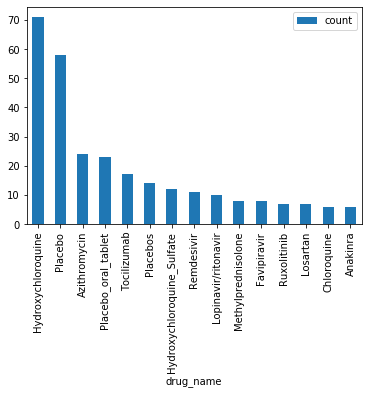

In [38]:
drug_df.groupby('drug_name').count().sort_values(by='count',ascending = False)[0:15].plot(kind='bar')

In [40]:
outcome_df = split_data_frame_list(data,target_column="outcome")


In [42]:
outcome_df['count'] = 1

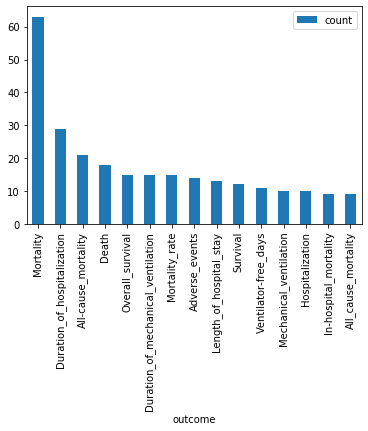

In [44]:
outcome_df.groupby('outcome').count().sort_values(by='count',ascending=False)[0:15].plot(kind='bar')

In [109]:
!pandas -version


/bin/sh: pandas: command not found


In [51]:
temp_df = data.explode('drug_name')
final_df = temp_df.explode('outcome')

In [52]:
final_df.count()

nct_number          10308
status              10308
interventions        9559
phases               8373
outcome_measures    10293
drug_name            6887
outcome             10293
dtype: int64

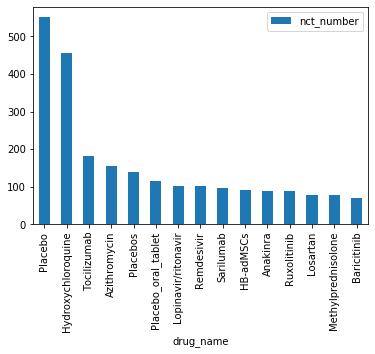

In [58]:
final_df.groupby('drug_name')[['nct_number']].count().sort_values(by='nct_number', ascending=False)[0:15].plot(kind='bar')




In [59]:
final_df.groupby('drug_name')[['nct_number']].count().sort_values(by='nct_number', ascending=False)[0:15]

,nct_number
drug_name,
Placebo,551
Hydroxychloroquine,457
Tocilizumab,181
Azithromycin,154
Placebos,139
Placebo_oral_tablet,115
Lopinavir/ritonavir,103
Remdesivir,102
Sarilumab,97


In [87]:
drug_name_list = final_df.drug_name.values

In [89]:
unique_drug_names = set(drug_name_list)

In [91]:
len(unique_drug_names)

482

In [93]:
import requests
rx_norm_list = []
for name in unique_drug_names:
    try:
        res1 = requests.get(f'https://rxnav.nlm.nih.gov/REST/Prescribe/drugs?name={name}',\
                              headers = {'Accept': 'application/json','Content-Type': 'application/json; charset=UTF-8'})

        rxcui_data = res1.json()
        rxcui = rxcui_data['drugGroup']['conceptGroup'][0]['conceptProperties'][0]['rxcui']
    except KeyError:
        rxcui = None
    rx_norm_list.append(rxcui)

In [97]:
list(zip(unique_drug_names,rx_norm_list))

[(nan, None),
 ('Standard_therapy_of_COVID-19', None),
 ('Vitamin_C', None),
 ('Atovaquone/Azithromycin', None),
 ('Lopinavir_/_ritonavir,_alpha-interferon_nebulization', None),
 ('0.12%_Chlorhexidine_oral/nasal_rinse', None),
 ('Sarilumab_SAR153191', None),
 ('Experimental_drug', None),
 ('Sevoflurane', None),
 ('Placebo', None),
 ('Interferon-Alpha2B', None),
 ('lopinavir/ritonavir_group', None),
 ('Enoxaparin_Prefilled_Syringe_[Lovenox]', None),
 ('Placebo_plus_standard_preventive_measures', None),
 ('Eicosapentaenoic_acid_gastro-resistant_capsules', None),
 ('Nitric_Oxide_Gas', None),
 ('Ivermectine', None),
 ('Macrolide_administered_for_up_to_14_days', None),
 ('Matched_Placebo', None),
 ('Dexmedetomidine_Injectable_Product', None),
 ('Best_supportive_Care_(BSC)_+_IFX-1', None),
 ('BAT_+_Calcifediol', None),
 ('Standard_therapy_for_COVID-19_according_to_the_stablished_hospital_protocols.',
  None),
 ('AT-001', None),
 ('Ribavirin', '1487498'),
 ('Aviptadil_by_intravenous_infusion_

In [99]:
for name in unique_drug_names:
    print(name)

nan
Standard_therapy_of_COVID-19
Vitamin_C
Atovaquone/Azithromycin
Lopinavir_/_ritonavir,_alpha-interferon_nebulization
0.12%_Chlorhexidine_oral/nasal_rinse
Sarilumab_SAR153191
Experimental_drug
Sevoflurane
Placebo
Interferon-Alpha2B
lopinavir/ritonavir_group
Enoxaparin_Prefilled_Syringe_[Lovenox]
Placebo_plus_standard_preventive_measures
Eicosapentaenoic_acid_gastro-resistant_capsules
Nitric_Oxide_Gas
Ivermectine
Macrolide_administered_for_up_to_14_days
Matched_Placebo
Dexmedetomidine_Injectable_Product
Best_supportive_Care_(BSC)_+_IFX-1
BAT_+_Calcifediol
Standard_therapy_for_COVID-19_according_to_the_stablished_hospital_protocols.
AT-001
Ribavirin
Aviptadil_by_intravenous_infusion_+_maximal_intensive_care
Ibuprofen
CHLORPROMAZINE_(CPZ)
Normal_saline
Dietary_Supplement_containing_resistant_starch
Placebo_for_Azithromycin
None
DAS181_OL
Progesterone_100_MG
Dexamethasone
Hydroxychloroquine_+_Placebo
Deferoxamine
Linagliptin_5_MG
Imatinib
Angiotensin-Converting_Enzyme_Inhibitors_(ACE-I)_

In [98]:
# https://rxnav.nlm.nih.gov/REST/Prescribe/drugs?name=Ivermectin



In [83]:
import requests

res1 = requests.get('https://rxnav.nlm.nih.gov/REST/Prescribe/drugs?name=Azithromycin',\
                      headers = {'Accept': 'application/json','Content-Type': 'application/json; charset=UTF-8'})

rxcui_data = res1.json()
rxcui = rxcui_data['drugGroup']['conceptGroup'][0]['conceptProperties'][0]['rxcui']



res2 = requests.get(f'https://rxnav.nlm.nih.gov/REST/rxclass/class/byRxcui.json?rxcui={rxcui}&relaSource=MESH',
                         headers = {'Accept': 'application/json','Content-Type': 'application/json; charset=UTF-8'})

data = response.json()
data

{'userInput': {'relaSource': 'MESH', 'relas': 'ALL', 'rxcui': '750149'},
 'rxclassDrugInfoList': {'rxclassDrugInfo': [{'minConcept': {'rxcui': '18631',
     'name': 'Azithromycin',
     'tty': 'IN'},
    'rxclassMinConceptItem': {'classId': 'D000900',
     'className': 'Anti-Bacterial Agents',
     'classType': 'MESHPA'},
    'rela': '',
    'relaSource': 'MESH'}]}}

In [81]:
rxcui = rxcui_data['drugGroup']['conceptGroup'][0]['conceptProperties'][0]['rxcui']

In [82]:
import requests
# 979092
response = requests.get(f'https://rxnav.nlm.nih.gov/REST/rxclass/class/byRxcui.json?rxcui={rxcui}&relaSource=MESH',
                         headers = {'Accept': 'application/json','Content-Type': 'application/json; charset=UTF-8'})
data = response.json()
data

{'userInput': {'relaSource': 'MESH', 'relas': 'ALL', 'rxcui': '750149'},
 'rxclassDrugInfoList': {'rxclassDrugInfo': [{'minConcept': {'rxcui': '18631',
     'name': 'Azithromycin',
     'tty': 'IN'},
    'rxclassMinConceptItem': {'classId': 'D000900',
     'className': 'Anti-Bacterial Agents',
     'classType': 'MESHPA'},
    'rela': '',
    'relaSource': 'MESH'}]}}

In [68]:
data['rxclassDrugInfoList']['rxclassDrugInfo'][0]['rxclassMinConceptItem']['className']

'Anti-Bacterial Agents'

In [45]:
pd.__version__

'1.0.3'

In [88]:
# !conda update pandas

Solving environment: done

## Package Plan ##

  environment location: /Users/vasanththirugnanam/anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    asn1crypto-1.3.0           |           py37_0         162 KB
    attrs-19.3.0               |             py_0          39 KB
    beautifulsoup4-4.9.0       |           py37_0         165 KB
    bleach-3.1.4               |             py_0         114 KB
    bzip2-1.0.8                |       h1de35cc_0         104 KB
    cffi-1.14.0                |   py37hb5b8e2f_0         219 KB
    chardet-3.0.4              |        py37_1003         173 KB
    click-7.1.1                |             py_0          67 KB
    conda-package-handling-1.6.0|   py37h1de35cc_0         1.4 MB
    cryptography-2.8           |   py37ha12b0ac_0         581 KB
    cython-0.29.17             |   py37h0a44026_0        

Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.

